In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import pathlib
#seaborn
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


dataset_path = r"C:\Users\Demir\Desktop\CS Sophomore\CS CLUB\TestEarth"
data_dir = pathlib.Path(dataset_path)  # Now pathlib is properly imported

print("Dataset directory set successfully!")

Dataset directory set successfully!


In [4]:
pip install tensorflow numpy opencv-python matplotlib


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 10.7 MB/s eta 0:00:04
   ---- ----------------------------------- 4.5/39.5 MB 10.8 MB/s eta 0:00:04
   ------ --------------------------------- 6.8/39.5 MB 10.8 MB/s eta 0:00:04
   --------- ------------------------------ 8.9/39.5 MB 10.7 MB/s eta 0:00:03
   ----------- ---------------------------- 11.0/39.5 MB 10.4 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/39.5 MB 10.5 MB/s eta 0:00:03
   --------------- ------------------------ 15.7/39.5 MB 10.6 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/39.5 MB 10.6 MB/s eta 0:00:03
   -------------------- ------------------- 20.4/39.5 MB 10.6 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/39.5 MB 10.2 MB/s eta 0:00:02
   ----------------------- ---------------- 23.3/39.5 MB 9.9 MB/s eta 0:00:02
   -------------------------- ------------- 25.7/39.5 MB 10.0 MB/s


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Demir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
img_h = 224
img_w = 224
batch_size = 32

In [6]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed = 123,
    image_size=(img_h, img_w),
    batch_size=batch_size
)

Found 280 files belonging to 2 classes.
Using 224 files for training.
Found 280 files belonging to 2 classes.
Using 56 files for validation.


In [7]:
class_names = train_dataset.class_names
print(class_names)

['damaged', 'nodamage']


In [8]:
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(224, 224, 3),
                                                  pooling='avg',
                                                  weights='imagenet')

In [9]:
for layer in pretrained_model.layers:
    layer.trainable = False

In [10]:
resnet_model.add(pretrained_model)  # Add ResNet backbone
resnet_model.add(Flatten())  # Flatten the output into 1D
resnet_model.add(Dense(512, activation='relu'))  # Fully connected layer
resnet_model.add(Dense(2, activation='softmax'))  # Output layer (2 classes)

In [11]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

In [12]:
epochs = 10  # Number of training cycles
history = resnet_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs
)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5249 - loss: 3.1533 - val_accuracy: 0.8929 - val_loss: 0.3409
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8665 - loss: 0.4013 - val_accuracy: 0.7143 - val_loss: 0.8810
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9098 - loss: 0.2938 - val_accuracy: 0.9107 - val_loss: 0.2831
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 985ms/step - accuracy: 0.8995 - loss: 0.2149 - val_accuracy: 0.8214 - val_loss: 0.4948
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9632 - loss: 0.1614 - val_accuracy: 0.9107 - val_loss: 0.2720
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9612 - loss: 0.1092 - val_accuracy: 0.9107 - val_loss: 0.3108
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9696 - loss: 0.0981 - val_accuracy: 0.9107 - val_loss: 0.3231
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9878 - loss: 0.0594 - val_accuracy: 0.9107 - val_loss: 0.2481
Epoch 9/10
7

In [13]:
resnet_model.save("/content/building_damage_resnet50.h5")

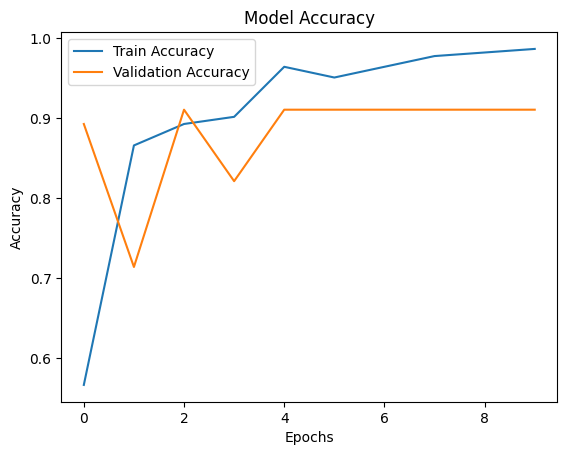

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


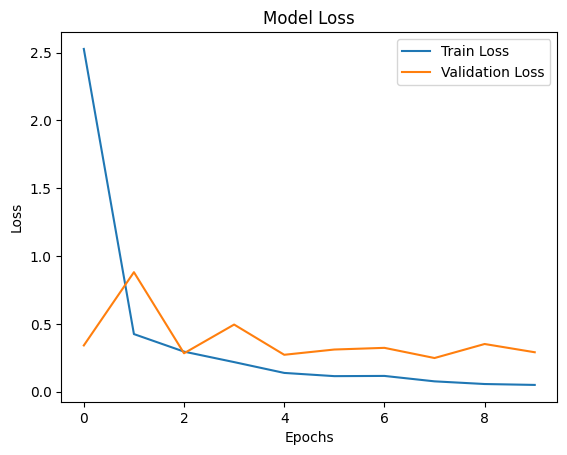

In [15]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [16]:
def predict_building_damage(image_path):
    image = cv2.imread(image_path)  # Load image
    image_resized = cv2.resize(image, (img_h, img_w))  # Resize to 180x180
    image = np.expand_dims(image_resized, axis=0)  # Add batch dimension

    pred = resnet_model.predict(image)  # Predict class probabilities
    output_class = class_names[np.argmax(pred)]  # Get predicted class
    print(f"The predicted class is: {output_class}")


In [22]:
test_image_path = r"C:\Users\Demir\Desktop\CS Sophomore\CS CLUB\Earthquake\Undamaged Building\1 (905).jpg"
predict_building_damage(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
The predicted class is: damaged
